## Imports

In [63]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns


## Dataset - Checkpoint 1

In [3]:
df = pd.read_csv('data/customer_churn.csv')

In [5]:
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [8]:
df.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
def show_categorical_values(df):
       categorical_values = ['Maior65Anos', 'Conjuge', 'Dependentes', 'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet', 'SegurancaOnline', 'BackupOnline', 
                            'SeguroNoDispositivo', 'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato', 'PagamentoOnline', 'FormaDePagamento', 'Churn']
       for col in categorical_values:
              print(col)
              print(df[col].value_counts())

show_categorical_values(df)

Maior65Anos
0    5901
1    1142
Name: Maior65Anos, dtype: int64
Conjuge
Nao    3641
Sim    3402
Name: Conjuge, dtype: int64
Dependentes
Nao    4933
Sim    2110
Name: Dependentes, dtype: int64
TelefoneFixo
Sim    6361
Nao     682
Name: TelefoneFixo, dtype: int64
VariasLinhasTelefonicas
Nao                     3390
Sim                     2971
SemServicoTelefonico     682
Name: VariasLinhasTelefonicas, dtype: int64
ServicoDeInternet
FibraOptica    3096
DSL            2421
Nao            1526
Name: ServicoDeInternet, dtype: int64
SegurancaOnline
Nao                     3498
Sim                     2019
SemServicoDeInternet    1526
Name: SegurancaOnline, dtype: int64
BackupOnline
Nao                     3088
Sim                     2429
SemServicoDeInternet    1526
Name: BackupOnline, dtype: int64
SeguroNoDispositivo
Nao                     3095
Sim                     2422
SemServicoDeInternet    1526
Name: SeguroNoDispositivo, dtype: int64
SuporteTecnico
Nao                     3473
Sim 

In [15]:
# Changing sim and nao to 1 and 0
yes_no_dict = {"Sim": 1, 
               "Nao": 0}

columns_to_modify = ['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']
df_modified = df[columns_to_modify].replace(yes_no_dict)
df_modified.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [16]:
# join df_modified and old df
df_dummies = pd.get_dummies(df.drop(columns_to_modify, axis=1))
df_final = pd.concat([df_dummies, df_modified], axis=1)
df_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,1
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,1


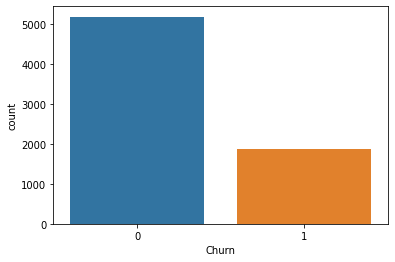

In [22]:
%matplotlib inline

ax = sns.countplot(x='Churn', data=df_final)

In [23]:
df_final['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [25]:
X_data = df_final.drop('Churn', axis = 1)
y_data = df_final['Churn']

In [26]:
smt = SMOTE(random_state=123) 
X_data, y_data = smt.fit_resample(X_data, y_data)

In [27]:
df_final = pd.concat([X_data, y_data], axis=1)

In [28]:
df_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,1
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,1


In [29]:
df_final['Churn'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Churn, dtype: float64

## KNN - Checkpoint 2

### Testing with one value

In [33]:
std = StandardScaler()
X_norm = std.fit_transform(X_data)

In [35]:
X_norm[0]

array([-0.41254225, -1.10768665, -1.32177005, -0.88499468,  3.18604176,
       -0.83366906,  1.51268338, -1.04386816, -0.44617598,  0.868102  ,
       -0.44617598, -0.51751958, -0.95853201, -0.44617598,  1.57389661,
        1.04306   , -0.44617598, -0.6419641 ,  0.87997069, -0.44617598,
       -0.52426638,  1.18690873, -0.44617598, -0.77707385,  1.20287745,
       -0.44617598, -0.79008532, -0.44648735,  0.73773107, -0.41989297,
       -0.42576817,  1.30373042, -0.47943196, -0.4360152 ,  1.26542767,
       -0.52756038, -3.06083934,  0.81514931])

In [44]:
X_test = [[0, 0, 1, 1, 0, 0, 39.9, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,0, 0, 1, 0, 0, 0, 1]]
X_test_norm = std.transform(pd.DataFrame(X_test, columns=X_data.columns))

In [61]:
def eucledian_dist(a, b):
    return np.sqrt(np.sum(np.square(a-b)))

In [54]:
X_test_np = np.array(X_test_norm)

In [60]:
np.sum(np.square(X_test_np - X_norm[0]))

7258.7055984807175

In [62]:
eucledian_dist(X_test_np, X_norm[0])

85.19803752716794

### With train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_data, test_size=0.3, random_state=42)

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
knn.score(X_test, y_test)

c:\Users\beatriz.maia\Documents\self_improvement\alura_machine_learning_advanced\venv\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8270531400966183